# The python imaging library

The Python Imaging Library is used for image manipulation. It can be imported using:

In [1]:
import PIL

And details about its version can be seen using:

In [2]:
PIL.__version__

'10.0.0'

## Image Module

The core ```Image``` module is designed for fast access to data stored in a few basic pixel formats and is imported using:

In [3]:
from PIL import Image

Image data is essentially in the form of an ```NDarray```. A four pixel black and white numpy array can be created using a bool datatype:

In [4]:
import numpy as np

In [5]:
image_data = np.array([[0, 1],
                       [1, 0]], dtype=bool)

An instance of the ```Image``` class can be initialised using the function ```fromarray```:

In [6]:
image = Image.fromarray(image_data)

Note that the ```Image``` class is found in the ```Image``` module:

In [7]:
type(image)

PIL.Image.Image

This ```Image``` instance has the attributes ```width``` and ```height``` which correspond to the number of columns and number of rows respectively:

In [8]:
ncols = image.width
ncols

2

In [9]:
nrows = image.height
nrows

2

The tuple size which is effectively ```(ncols, nrows)```:

In [10]:
image.size

(2, 2)

The ```mode``` which is ```'1'``` meaning binary:

In [11]:
mode = image.mode
mode

'1'

And the image format, in this case which is ```None```:

In [12]:
fmt = image.format
fmt

The image can be shown using the ```show``` method, this will open up the image in the Oeprating Systems default image viewer hanging the OIPython Kernel until the default image viewer is closed. Note that most image viewers aren't cofigured to view an image with so few pixels:

The image can be saved using the ```save``` method:

In [13]:
image.save('binary.png')

In [14]:
image.save('binary.jpg')

Such an image can be opened in an image manipulation program like paint, which needs to be zoomed into maximum to view this image with so few pixels:

<img src='images/img_001.png' alt='img_001' width='450'/>

The image can be displayed using the ```pyplot``` function ```imshow```:

In [15]:
import matplotlib.pyplot as plt

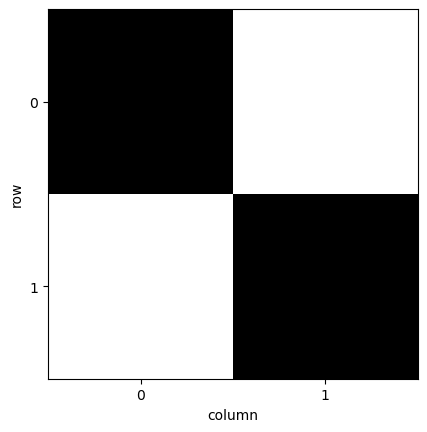

In [16]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

A grayscale image typically uses an unsigned 8 bit integer datatype with values ranging from ```0:256``` where the minimum value ```0``` is black, the maximum value ```255``` is white and intermediate values are gray. Conceptualise each pixel on a computer screen as a white LED that has a brightness that scales to this 8 bit integer:

In [17]:
image_data = np.array([[  0,  85],
                       [170, 255]], dtype=np.uint8)

In [18]:
image = Image.fromarray(image_data)

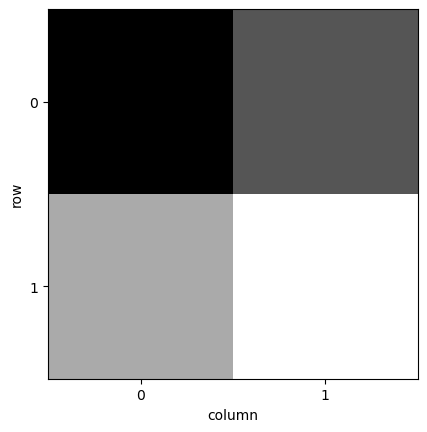

In [19]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The image attributes can be examined:

In [20]:
ncols = image.width
ncols

2

In [21]:
nrows = image.height
nrows

2

In [22]:
image.size

(2, 2)

In [23]:
image.mode

'L'

In [24]:
image.format

The main difference from the above is the mode which is ```'L'``` which is an abbreviation for the Luma transform which essentially means grayscale. This will be examined in more detail later after a color image has been examined.

The human eye has three color receptors that are short wavelength (blue) sensitive, medium wavelength (green) sensitive and long wavelength (red) sensitive. Each pixel in a computer screen is effectively a Red, Green, Blue (RGB) LED and each color channel has an independent 8 bit unsigned integer that controls the perspective LEDs brightness. The color for each pixel is therefore expressed using a 3 element ```tuple``` of the form ```(r, g, b)```:

In [25]:
image_data = np.array([[(  0,   0,   0), (255,   0,   0)],
                       [(  0, 255,   0), (   0,  0, 255)]], dtype=np.uint8)

In [26]:
image_data

array([[[  0,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0,   0, 255]]], dtype=uint8)

In [27]:
image = Image.fromarray(image_data)

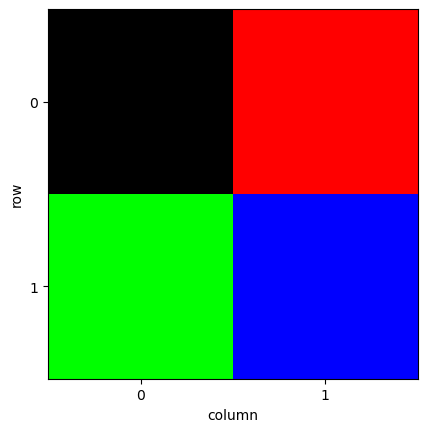

In [28]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The image attributes can be examined:

In [29]:
ncols = image.width
ncols

2

In [30]:
nrows = image.height
nrows

2

In [31]:
image.size

(2, 2)

In [32]:
image.mode

'RGB'

In [33]:
image.format

The main difference from the above is the mode which is ```'RGB'``` which is an abbreviation for Red, Blue and Green.

The above diagram shows the absense of color (black) and the three primary colors (red, green and blue). Physiologically our eyes measure light ratios at these wavelengths and our brain maps these ratios to a color. The three secondary colors are the result of mixing light of maximum intensity from two color channels cyan (green and blue), magenta (red and blue), yellow (red and green). If all three channels are at maximum intensity white (red, green and blue) is perceived:

In [34]:
image_data = np.array([[(  0,   0,   0), (255,   0,   0), (  0, 255,   0), (  0,   0, 255)],
                       [(  0, 255, 255), (255,   0, 255), (255, 255,   0), (255, 255, 255)]], dtype=np.uint8)

In [35]:
image_data

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[  0, 255, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255, 255]]], dtype=uint8)

In [36]:
image = Image.fromarray(image_data)

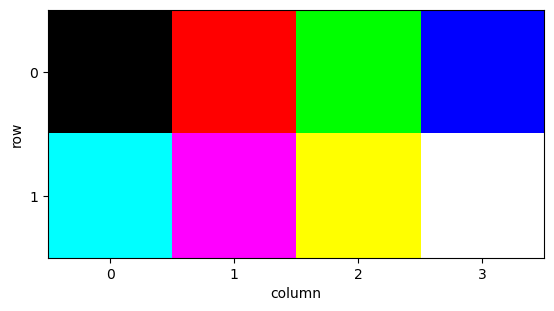

In [37]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The image attributes can be examined:

In [38]:
ncols = image.width
ncols

4

In [39]:
nrows = image.height
nrows

2

In [40]:
image.size

(4, 2)

In [41]:
image.mode

'RGB'

In [42]:
image.format

If we return to the array ```image_data```:

In [43]:
image_data

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[  0, 255, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255, 255]]], dtype=uint8)

Each color channel can be seperated by slicing:

In [44]:
reds = image_data[:, :, 0]
reds

array([[  0, 255,   0,   0],
       [  0, 255, 255, 255]], dtype=uint8)

In [45]:
greens = image_data[:, :, 1]
greens

array([[  0,   0, 255,   0],
       [255,   0, 255, 255]], dtype=uint8)

In [46]:
blues = image_data[:, :, 2]
blues

array([[  0,   0,   0, 255],
       [255, 255,   0, 255]], dtype=uint8)

A black and white image could be taken by summing a third of each channel i.e.

$$\frac{\text{reds}}{3} + \frac{\text{greens}}{3} + \frac{\text{blues}}{3}$$

However the Luma transform uses slightly different proportions to mimic our eyes has a slightly different sensitivity to each color channel:

$$\text{reds}\cdot\frac{299}{1000} + \text{greens}\cdot\frac{587}{1000} + \text{blues}\cdot\frac{114}{1000}$$

In [47]:
luma_grayscale = np.array(reds * (299 / 1000) + greens * (587 / 1000) + blues * (114 / 1000), dtype='uint8')

In [48]:
luma_grayscale

array([[  0,  76, 149,  29],
       [178, 105, 225, 255]], dtype=uint8)

In [49]:
image = Image.fromarray(luma_grayscale)

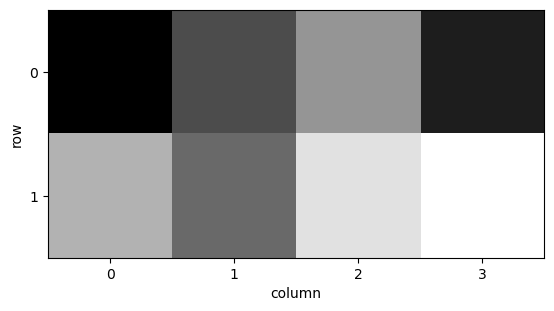

In [50]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray');
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

Coloured images can be ```'RGB'``` or ```'RGBA'```, the fourth channel is the alpha channel which is the transparency of the color:

In [51]:
image_data = np.array([[(  0,   0,   0,  15), (255,   0,   0,  15), (  0, 255,   0,  15), (  0,   0, 255,  15)],
                       [(  0, 255, 255,  15), (255,   0, 255,  15), (255, 255,   0,  15), (255, 255, 255,  15)],
                       [(  0,   0,   0,  85), (255,   0,   0,  85), (  0, 255,   0,  85), (  0,   0, 255,  85)],
                       [(  0, 255, 255,  85), (255,   0, 255,  85), (255, 255,   0,  85), (255, 255, 255,  85)],
                       [(  0,   0,   0, 170), (255,   0,   0, 170), (  0, 255,   0, 170), (  0,   0, 255, 170)],
                       [(  0, 255, 255, 170), (255,   0, 255, 170), (255, 255,   0, 170), (255, 255, 255, 170)],
                       [(  0,   0,   0, 255), (255,   0,   0, 255), (  0, 255,   0, 255), (  0,   0, 255, 255)],
                       [(  0, 255, 255, 255), (255,   0, 255, 255), (255, 255,   0, 255), (255, 255, 255, 255)]], 
                      dtype=np.uint8)

In [52]:
image = Image.fromarray(image_data)

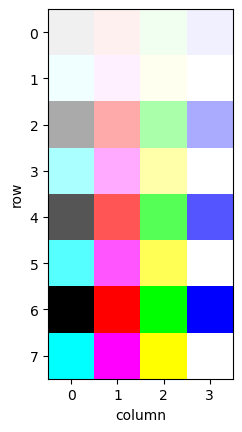

In [53]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(8), [str(i) for i in range(8)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

Since each color uses an 8 bit channel, they are often expressed in hexadecimal form ```#rrggbbaa```, where ```rr```, ```gg```, ```bb``` and an optional ```aa``` are two hexadecimal characters corresponding to each channel. All the [CSS color names](https://matplotlib.org/stable/gallery/color/named_colors.html) are also recognised as strings.

The ```randint``` function from the ```numpy.random``` module can be imported using:

In [54]:
import numpy.random as random

For reproducability the ```seed``` can be set to ```0```:

In [55]:
random.seed(0)

For simplicity a grayscale image will be examined. Recall each pixel is an unsigned 8 bit integer. 

In [56]:
image_data = random.randint(low=0, high=256, size=(9, 9), dtype='uint8')

An an ```Image``` instance ```image``` can be constructed:

In [57]:
image_original_gs = Image.fromarray(image_data)

For a color image ```image_data``` there are three channels for each pixel:

In [58]:
image_data = random.randint(low=0, high=256, size=(9, 9, 3), dtype='uint8')

In [59]:
image_original = Image.fromarray(image_data)

A ```plot_filter_gs``` and ```plot_filter``` function can be created for viewing the grayscale and color images respectively:

In [60]:
def plot_filter_gs(image, title):
    fig, ax = plt.subplots();
    ax.imshow(image, cmap='gray', interpolation='none');
    ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_xlabel('column');
    ax.set_ylabel('row');
    ax.set_title(title);

In [61]:
def plot_filter(image, title):
    fig, ax = plt.subplots();
    ax.imshow(image);
    ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_xlabel('column');
    ax.set_ylabel('row');
    ax.set_title(title);

The images can be examined:

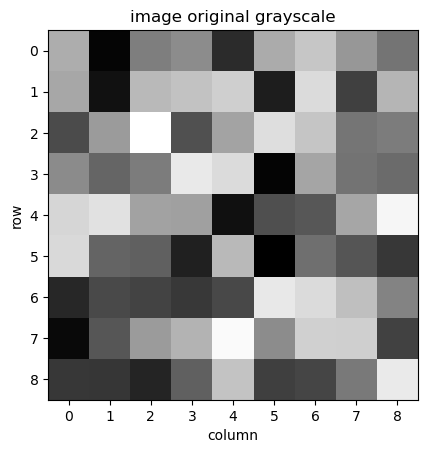

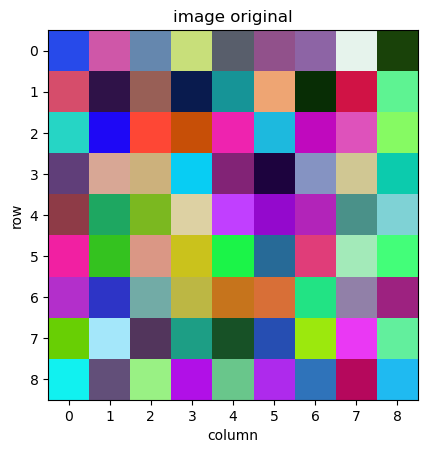

In [62]:
plot_filter_gs(image_original_gs, title='image original grayscale')
plot_filter(image_original, title='image original')

In [63]:
image_original.split()

(<PIL.Image.Image image mode=L size=9x9>,
 <PIL.Image.Image image mode=L size=9x9>,
 <PIL.Image.Image image mode=L size=9x9>)

Notice each channel has the ```mode=L``` which indicates they are individually treated as grayscale. ```tuple``` unpacking is typically used to assign each chanenl to an instance name:

In [64]:
(r, g, b) = image_original.split()

Once manipulation of each channel is carried out, the ```Image``` class method ```merge``` can be used to construct a color image from the three color channels:

In [65]:
image_reconstructed = Image.merge(mode='RGB', bands=(r, g, b))

A grayscale image with a pattern can also be produced:

In [66]:
image_data = 66 * np.ones(shape=(9, 9), dtype='uint8')
image_data[2:7, 2] = 15
image_data[2, 2:7] = 15
image_data[2:7, 6] = 15
image_data[6, 2:7] = 15

In [67]:
image_data

array([[66, 66, 66, 66, 66, 66, 66, 66, 66],
       [66, 66, 66, 66, 66, 66, 66, 66, 66],
       [66, 66, 15, 15, 15, 15, 15, 66, 66],
       [66, 66, 15, 66, 66, 66, 15, 66, 66],
       [66, 66, 15, 66, 66, 66, 15, 66, 66],
       [66, 66, 15, 66, 66, 66, 15, 66, 66],
       [66, 66, 15, 15, 15, 15, 15, 66, 66],
       [66, 66, 66, 66, 66, 66, 66, 66, 66],
       [66, 66, 66, 66, 66, 66, 66, 66, 66]], dtype=uint8)

In [68]:
image_pattern_gs = Image.fromarray(image_data)

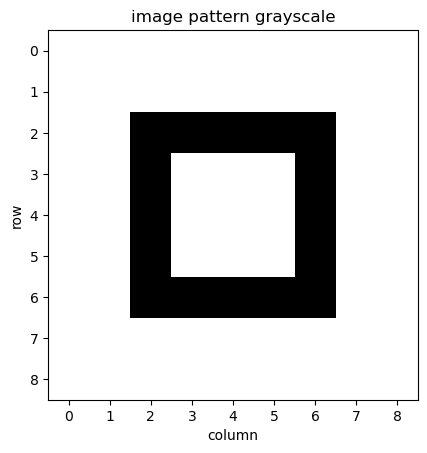

In [69]:
plot_filter_gs(image_pattern_gs, title='image pattern grayscale')

These images will be used as example images for image editing in subsequent sections.

## ImageColor Module

The ```ImageColor``` module contains a number of functions for converting a color to the desired format, i.e. a ```(r, g, b)``` tuple:

In [70]:
from PIL import ImageColor

The main function is ```getrgb```:

In [71]:
ImageColor.getrgb('royalblue')

(65, 105, 225)

In [72]:
ImageColor.getrgb('tomato')

(255, 99, 71)

In [73]:
ImageColor.getrgb('#ff0000')

(255, 0, 0)

In [74]:
ImageColor.getrgb('#ff0000ff')

(255, 0, 0, 255)

Unfortunately the function does not scale to an array of values:

In [75]:
image_data = np.array([['dimgray', 'tomato', 'springgreen', 'royalblue'],
                       ['turquoise', 'fuchsia', 'gold', 'snow']])

The ```getcolor``` function is designed for a scalar and not broadcast across an ```ndarray```. Therefore it is easier to flatten the image:

In [76]:
dimensions = image_data.shape
dimensions

(2, 4)

In [77]:
image_data = image_data.flatten()

Perform a ```list comprehension```:

In [78]:
image_data = np.array([ImageColor.getrgb(pixel) for pixel in image_data], dtype='uint8')

In [79]:
image_data

array([[105, 105, 105],
       [255,  99,  71],
       [  0, 255, 127],
       [ 65, 105, 225],
       [ 64, 224, 208],
       [255,   0, 255],
       [255, 215,   0],
       [255, 250, 250]], dtype=uint8)

And then reshape:

In [80]:
image_data = image_data.reshape(dimensions + (3,))

In [81]:
image_data

array([[[105, 105, 105],
        [255,  99,  71],
        [  0, 255, 127],
        [ 65, 105, 225]],

       [[ 64, 224, 208],
        [255,   0, 255],
        [255, 215,   0],
        [255, 250, 250]]], dtype=uint8)

In [82]:
image = Image.fromarray(image_data)

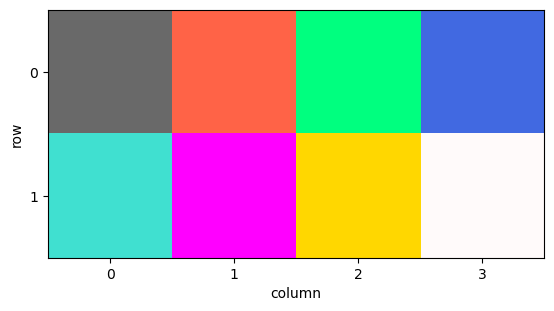

In [83]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

## ImageMath Module

Fundamentally an image consists of numeric data, similar in form to an ```ndarray```. The ```ImageMath``` module can be used to perform array manipulation:

In [84]:
from PIL import ImageMath

The grayscale image only has 1 color channel (```mode='L'```) and is therefore easier to understand when it comes to array manipulation:

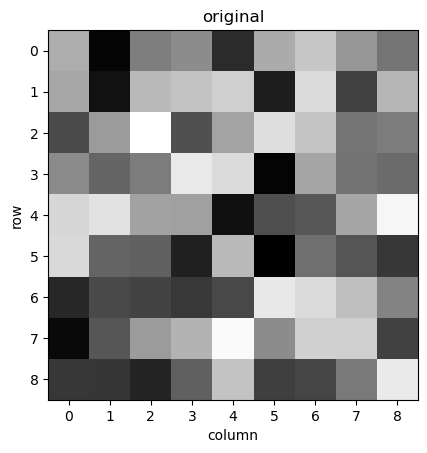

In [85]:
plot_filter_gs(image=image_original_gs, title='original')

In [86]:
image_original_gs.mode

'L'

A mathematical expression can be evaluated to get the inverse, recalling that an 8 bit unsigned integer has a maximum value of ```255```:

In [87]:
expression = '255 - int(x)'

An inverted grayscale image can be created using:

In [88]:
image_inverted_gs = ImageMath.eval(expression, x=image_original_gs)

Be careful, mode is converted from ```'L'``` (unsigned 8 bit integer) to ```'I'``` (signed 32 bit integer):

In [89]:
image_inverted_gs.mode

'I'

It needs to be converted back to ```'L'``` in order to display properly:

In [90]:
image_inverted_gs = image_inverted_gs.convert(mode='L')

Now the grayscale image and its inverse can be plotted side by side:

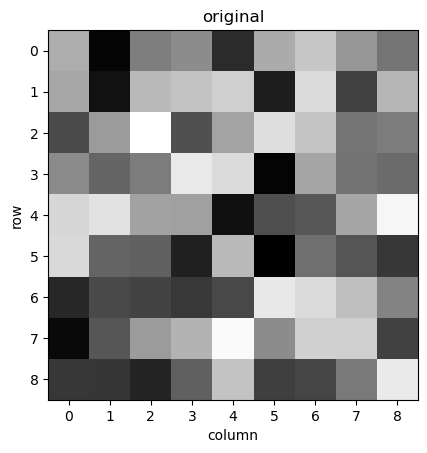

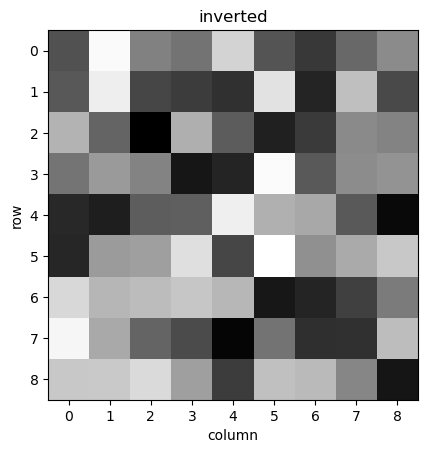

In [91]:
plot_filter_gs(image=image_original_gs, title='original')
plot_filter_gs(image=image_inverted_gs, title='inverted')

The color image only has 3 color channels (```mode='RGB'```):

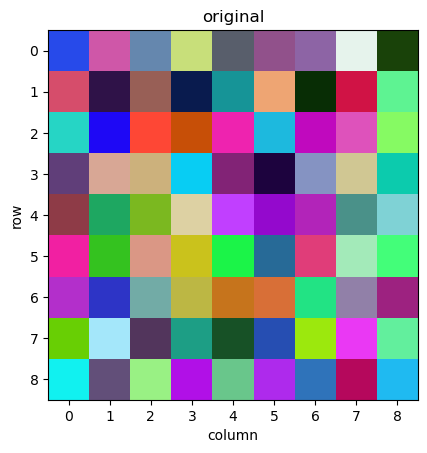

In [92]:
plot_filter(image=image_original, title='original')

Each channel is split using:

In [93]:
(r, g, b) = image_original.split()

Now an expression can be made for each color channel:

In [94]:
r_invert = ImageMath.eval(expression, x=r)
g_invert = ImageMath.eval(expression, x=g)
b_invert = ImageMath.eval(expression, x=b)

Each channel must be converted to the correct mode, ```mode='L'```:

In [95]:
r_invert = r_invert.convert(mode='L')
g_invert = g_invert.convert(mode='L')
b_invert = b_invert.convert(mode='L')

Then the channels can be merged to get the inverted image:

In [96]:
image_inverted = Image.merge(mode='RGB', bands=(r_invert, g_invert, b_invert))

Now the color image and its inverse can be plotted side by side:

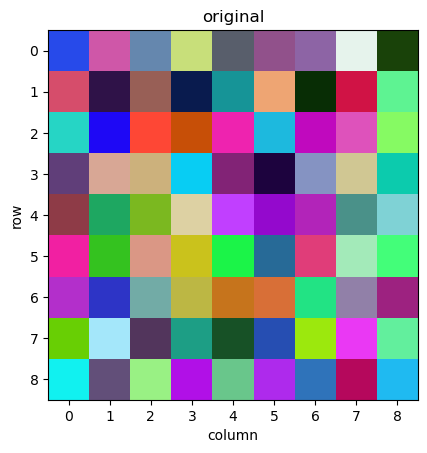

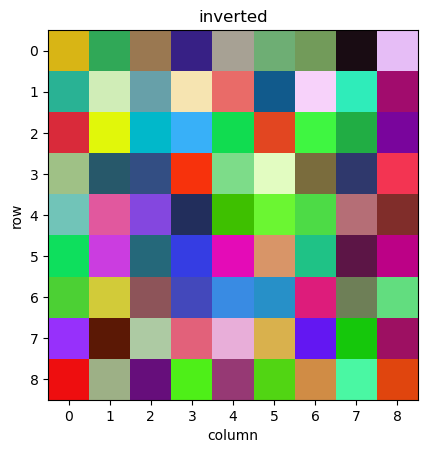

In [97]:
plot_filter(image=image_original, title='original')
plot_filter(image=image_inverted, title='inverted')

## ImageFilter Module

The ```ImageFilter``` module contains a filter classes:

In [98]:
from PIL import ImageFilter

If ```help``` is used on the module:

In [99]:
help(ImageFilter)

Help on module PIL.ImageFilter in PIL:

NAME
    PIL.ImageFilter

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # standard filters
    #
    # History:
    # 1995-11-27 fl   Created
    # 2002-06-08 fl   Added rank and mode filters
    # 2003-09-15 fl   Fixed rank calculation in rank filter; added expand call
    #
    # Copyright (c) 1997-2003 by Secret Labs AB.
    # Copyright (c) 1995-2002 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.object
        Filter
            ModeFilter
            MultibandFilter
                BoxBlur
                BuiltinFilter
                    BLUR
                    CONTOUR
                    DETAIL
                    EDGE_ENHANCE
                    EDGE_ENHANCE_MORE
                    EMBOSS
                    FIND_EDGES
                    Kernel
                    SHARPEN
                    SMOOTH
                    SMOOTH_MORE
          

The ```Filter``` class tree can be examined:

* Filter
    * ModeFilter
    * MultibandFilter
        * BoxBlur
        * BuiltinFilter
            * BLUR
            * CONTOUR
            * DETAIL
            * EDGE_ENHANCE
            * EDGE_ENHANCE_MORE
            * EMBOSS
            * FIND_EDGES
            * Kernel
            * SHARPEN
            * SMOOTH
            * SMOOTH_MORE
        * Color3DLUT
        * GaussianBlur
        * UnsharpMask
    * RankFilter
        * MaxFilter
        * MedianFilter
        * MinFilter

```Filter``` and ```MultibandFilter```, ```BuiltinFilter``` and ```RankFilter``` are all abstract classes used to group the other filters. The filter classes that are ```UPPER_SNAKE_CASE``` are constants and have no tunable parameters. The filters that are in ```PascalCase``` have tunable parameters and can be provided initialisation data for example ```GaussianBlur``` which has a named input argument ```radius```.

In [100]:
ImageFilter.GaussianBlur?

Init signature: ImageFilter.GaussianBlur(radius=2)
Docstring:     
Blurs the image with a sequence of extended box filters, which
approximates a Gaussian kernel. For details on accuracy see
<https://www.mia.uni-saarland.de/Publications/gwosdek-ssvm11.pdf>

:param radius: Standard deviation of the Gaussian kernel.
File:           c:\users\pyip\miniconda3\envs\jupyterlab\lib\site-packages\pil\imagefilter.py
Type:           type
Subclasses:     

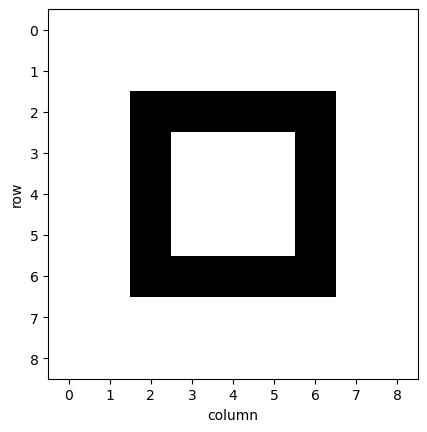

In [101]:
fig, ax = plt.subplots();
ax.imshow(image_pattern_gs, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The ```filter``` method of ```image``` can be used to apply a filter. Recall ```image``` is an instance of the ```Image``` class:

In [102]:
image_blurred = image_pattern_gs.filter(filter=ImageFilter.BLUR)

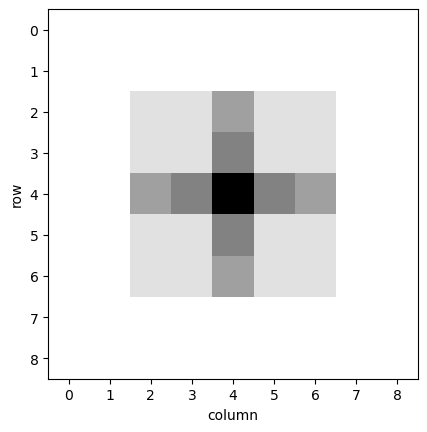

In [103]:
fig, ax = plt.subplots();
ax.imshow(image_blurred, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

This blurred image can be processed with a number of the other ```BuiltinFilter``` classes:

In [104]:
image_contour = image_blurred.filter(filter=ImageFilter.CONTOUR)
image_detail = image_blurred.filter(filter=ImageFilter.DETAIL)
image_edge_enhance = image_blurred.filter(filter=ImageFilter.EDGE_ENHANCE)
image_emboss = image_blurred.filter(filter=ImageFilter.EMBOSS)
image_find_edges = image_blurred.filter(filter=ImageFilter.FIND_EDGES)
image_sharpen = image_blurred.filter(filter=ImageFilter.SHARPEN)
image_smooth = image_blurred.filter(filter=ImageFilter.SMOOTH)

And these plots can be examined:

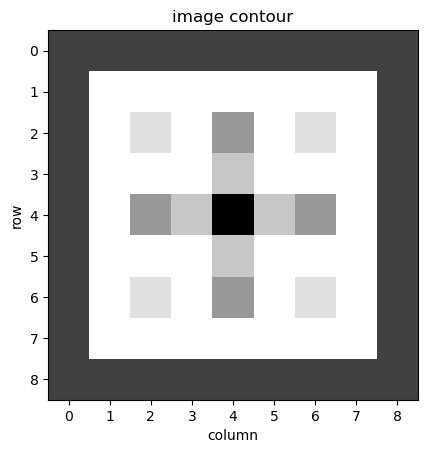

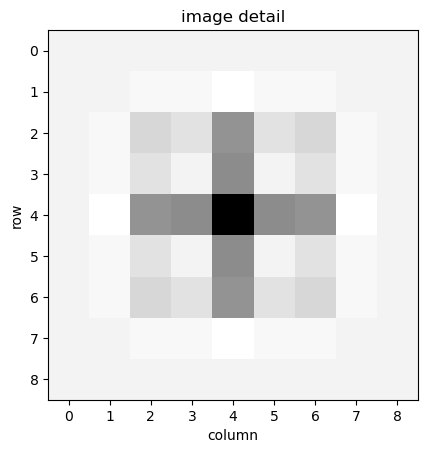

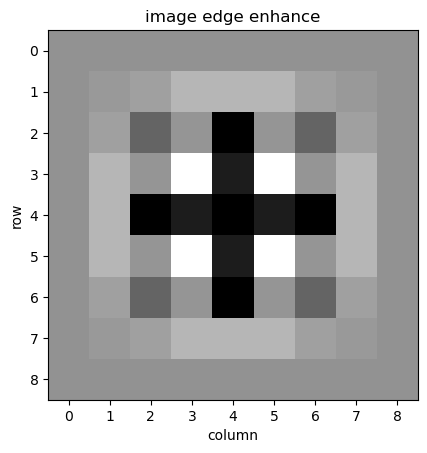

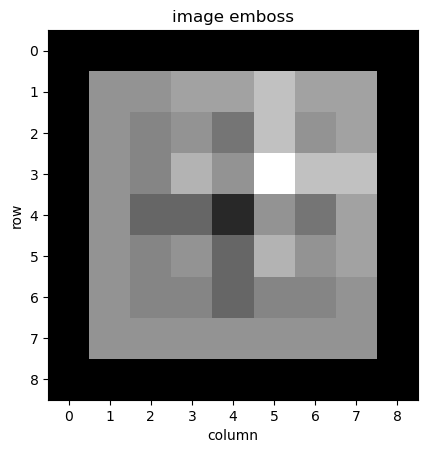

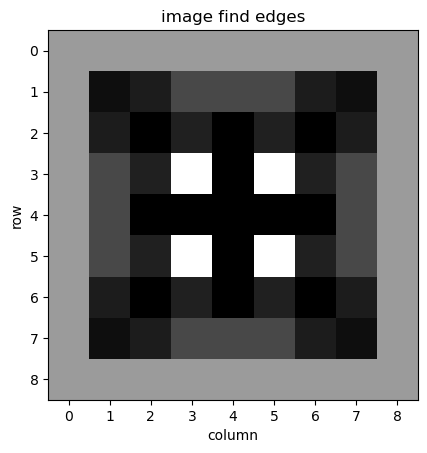

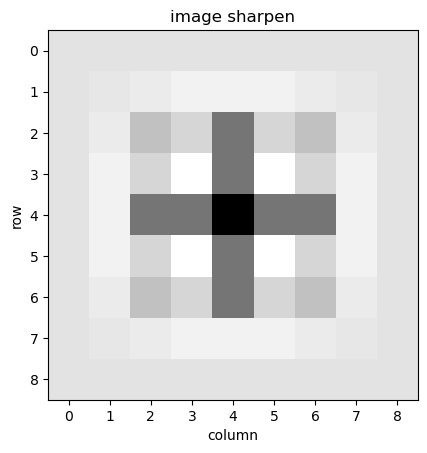

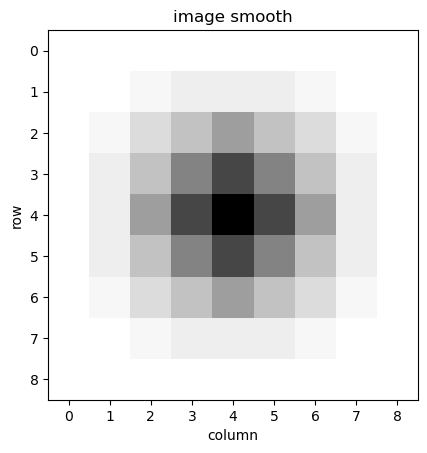

In [105]:
plot_filter_gs(image=image_contour, title='image contour')
plot_filter_gs(image=image_detail, title='image detail')
plot_filter_gs(image=image_edge_enhance, title='image edge enhance')
plot_filter_gs(image=image_emboss, title='image emboss')
plot_filter_gs(image=image_find_edges, title='image find edges')
plot_filter_gs(image=image_sharpen, title='image sharpen')
plot_filter_gs(image=image_smooth, title='image smooth')

The effect of changing the radius when using the ```GaussianBlur``` filter can be seen: 

In [137]:
image_gaussian_blur_r1 = image_original_gs.filter(filter=ImageFilter.GaussianBlur(radius=1))
image_gaussian_blur_r2 = image_original_gs.filter(filter=ImageFilter.GaussianBlur(radius=2))
image_gaussian_blur_r3 = image_original_gs.filter(filter=ImageFilter.GaussianBlur(radius=3))
image_gaussian_blur_r4 = image_original_gs.filter(filter=ImageFilter.GaussianBlur(radius=4))

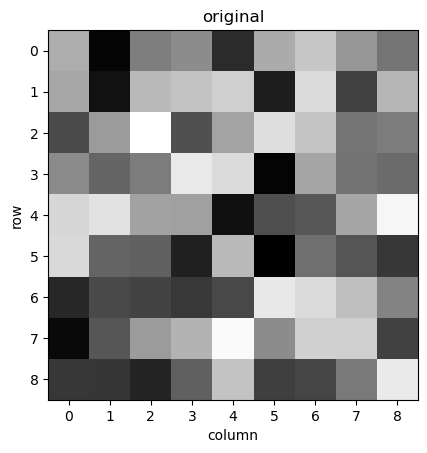

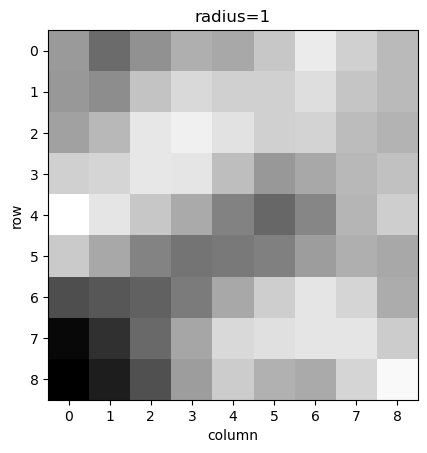

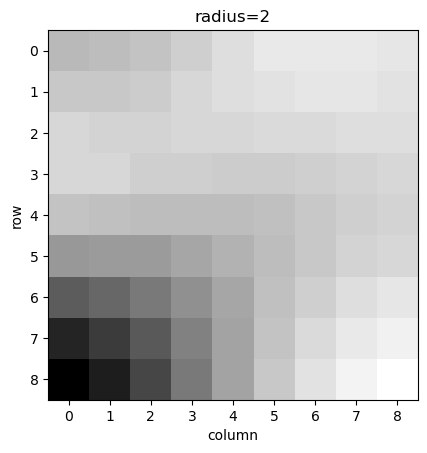

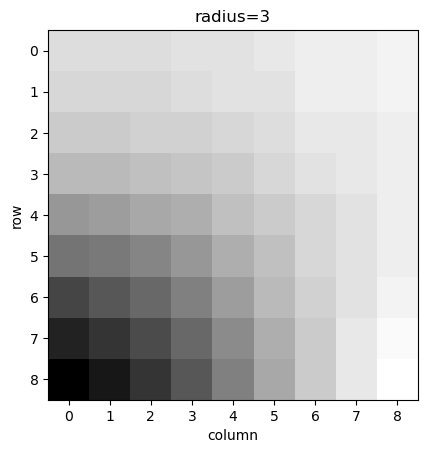

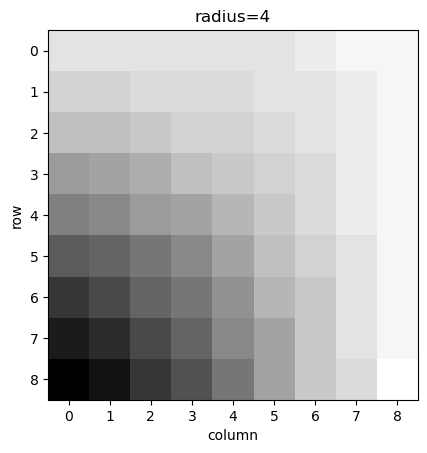

In [140]:
plot_filter_gs(image=image_original_gs, title='original')
plot_filter_gs(image=image_gaussian_blur_r1, title='radius=1')
plot_filter_gs(image=image_gaussian_blur_r2, title='radius=2')
plot_filter_gs(image=image_gaussian_blur_r3, title='radius=3')
plot_filter_gs(image=image_gaussian_blur_r4, title='radius=4')

## ImageEnhance Module

The ```ImageEnhance``` Module can be used to control an images sharpness and contrast:

In [108]:
from PIL import ImageEnhance

For example the ```Brightness``` can be controlled using:

In [109]:
brightness = ImageEnhance.Brightness(image_original)

In [110]:
image_brightness_00 = brightness.enhance(factor=0.0) # black image
image_brightness_05 = brightness.enhance(factor=0.5)
image_brightness_10 = brightness.enhance(factor=1.0) # original image
image_brightness_20 = brightness.enhance(factor=2.0)

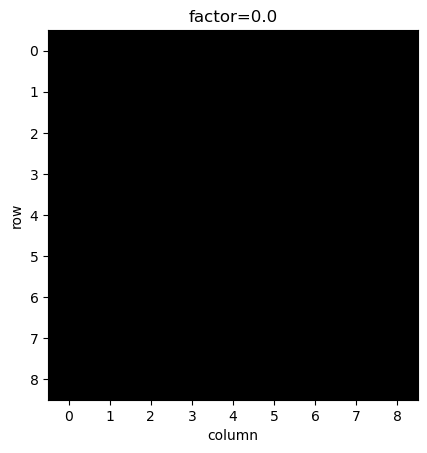

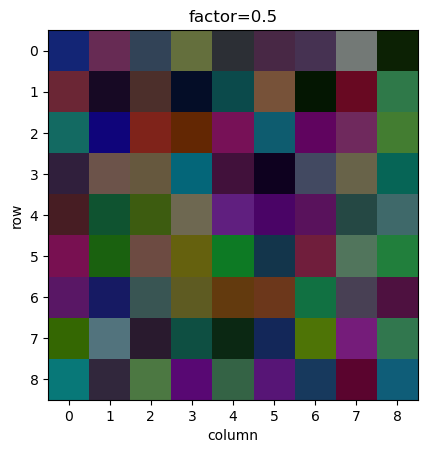

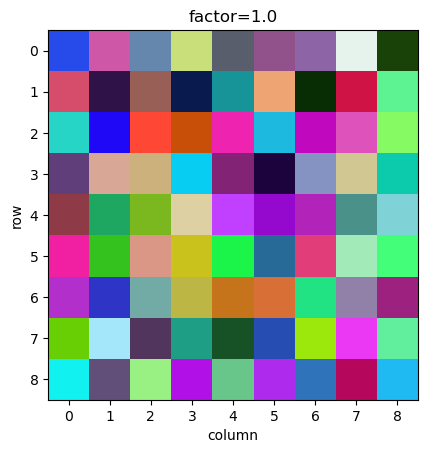

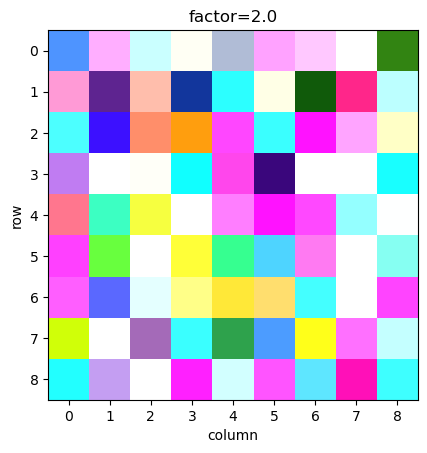

In [111]:
plot_filter(image=image_brightness_00, title='factor=0.0')
plot_filter(image=image_brightness_05, title='factor=0.5')
plot_filter(image=image_brightness_10, title='factor=1.0')
plot_filter(image=image_brightness_20, title='factor=2.0')

The ```Contrast``` can be changed using:

In [112]:
contrast = ImageEnhance.Contrast(image_original)

In [113]:
image_contrast_00 = contrast.enhance(factor=0.0) # solid grey image
image_contrast_05 = contrast.enhance(factor=0.5)
image_contrast_10 = contrast.enhance(factor=1.0) # original image
image_contrast_20 = contrast.enhance(factor=2.0)

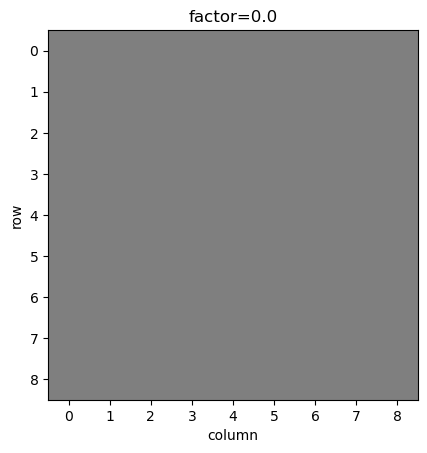

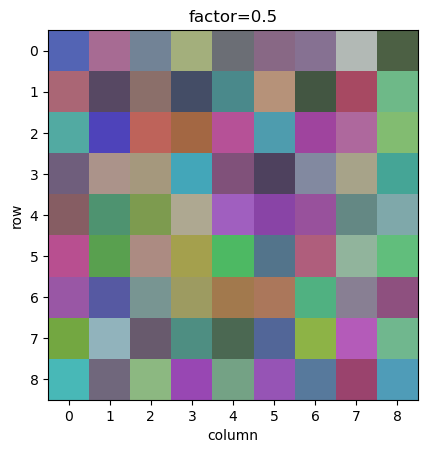

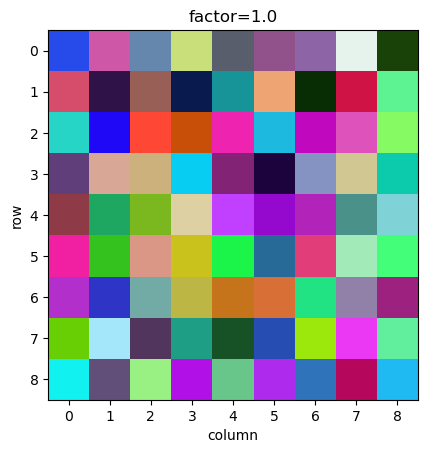

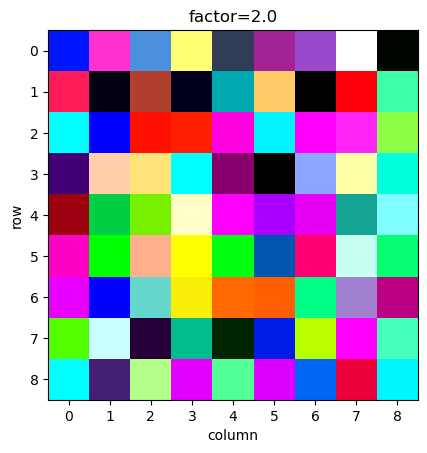

In [114]:
plot_filter(image=image_contrast_00, title='factor=0.0')
plot_filter(image=image_contrast_05, title='factor=0.5')
plot_filter(image=image_contrast_10, title='factor=1.0')
plot_filter(image=image_contrast_20, title='factor=2.0')

The ```Sharpness``` can be changed using:

In [115]:
sharpness = ImageEnhance.Sharpness(image_original)

In [116]:
image_sharpness_00 = sharpness.enhance(factor=0.0) # blurred image
image_sharpness_05 = sharpness.enhance(factor=0.5)
image_sharpness_10 = sharpness.enhance(factor=1.0) # original image
image_sharpness_20 = sharpness.enhance(factor=2.0) # sharpened image

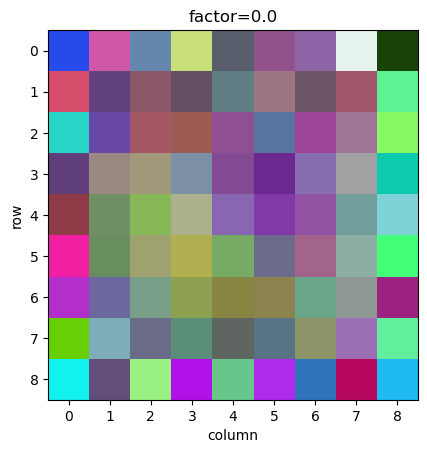

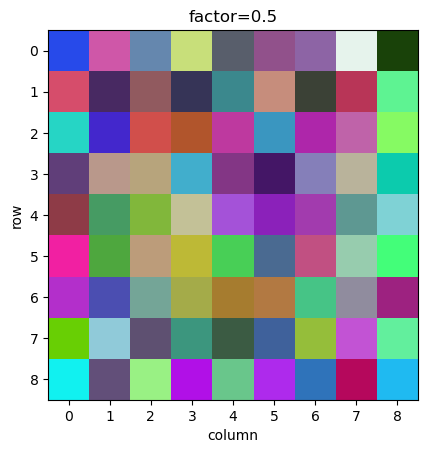

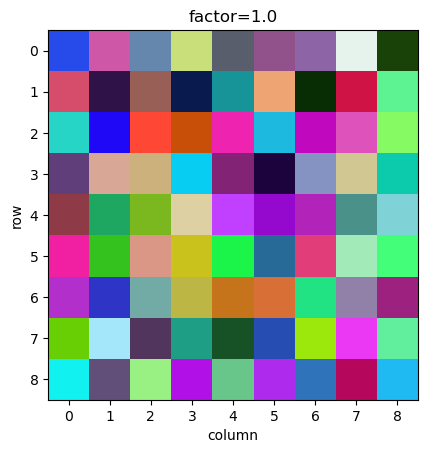

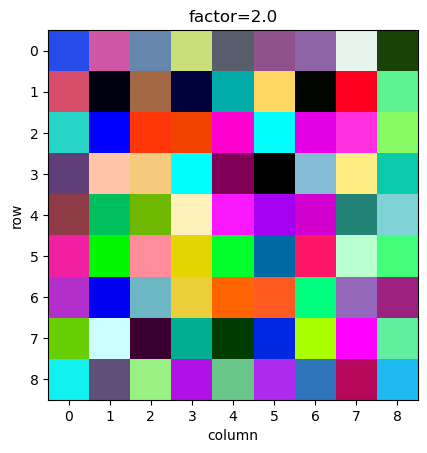

In [117]:
plot_filter(image=image_sharpness_00, title='factor=0.0')
plot_filter(image=image_sharpness_05, title='factor=0.5')
plot_filter(image=image_sharpness_10, title='factor=1.0')
plot_filter(image=image_sharpness_20, title='factor=2.0')

The ```Color``` can be changed using:

In [118]:
color = ImageEnhance.Color(image_original)

In [119]:
image_color_00 = color.enhance(factor=0.0) # black and white image
image_color_05 = color.enhance(factor=0.5)
image_color_10 = color.enhance(factor=1.0) # original image
image_color_20 = color.enhance(factor=2.0) 

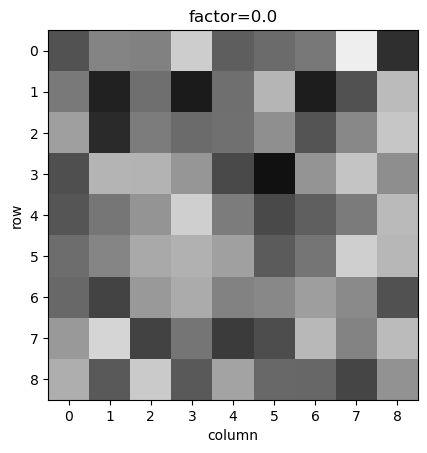

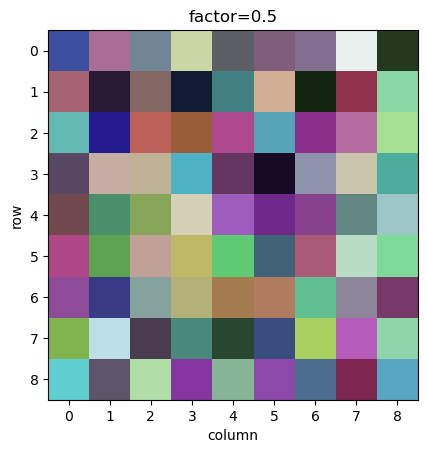

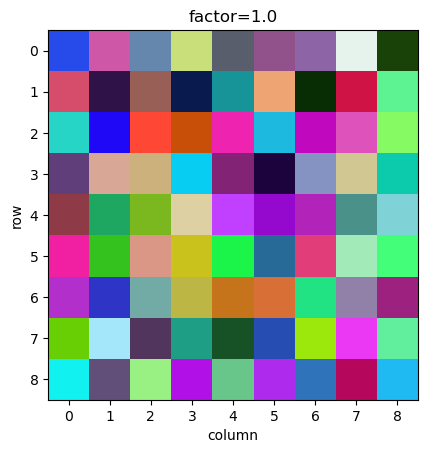

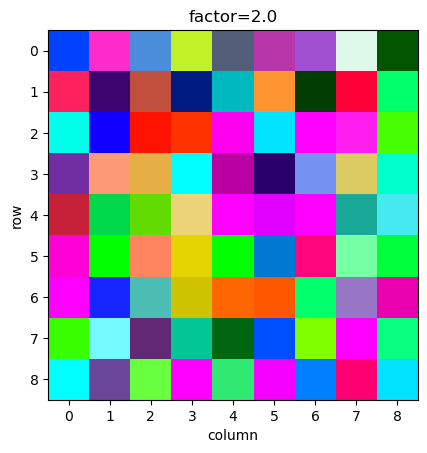

In [120]:
plot_filter(image=image_color_00, title='factor=0.0')
plot_filter(image=image_color_05, title='factor=0.5')
plot_filter(image=image_color_10, title='factor=1.0')
plot_filter(image=image_color_20, title='factor=2.0')

## ImageOps Module

The ```ImageOps``` module as the name suggests contains a number of common image operations:

In [141]:
from PIL import ImageOps

The ```PIL.ImageOps``` function ```invert``` can be used to invert an image:

In [144]:
image_invert = ImageOps.invert(image_original)

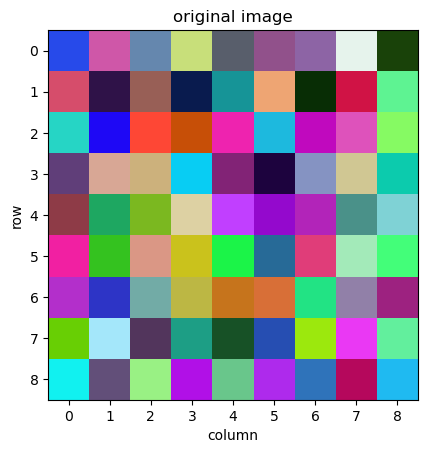

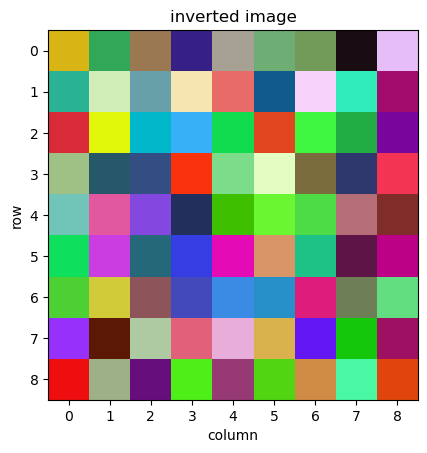

In [147]:
plot_filter(image=image_original, title='original image')
plot_filter(image=image_invert, title='inverted image')

The ```PIL.ImageOps``` function ```grayscale``` can be used to convert a color image to grayscale:

In [148]:
image_grayscale = ImageOps.grayscale(image_original)

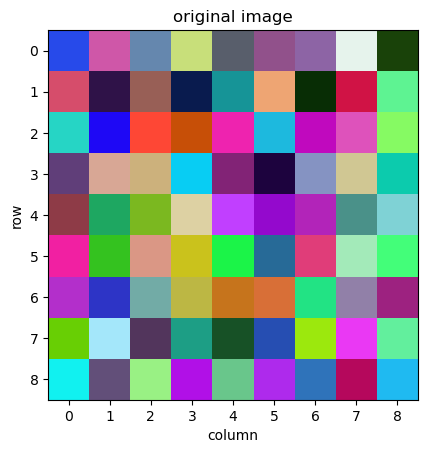

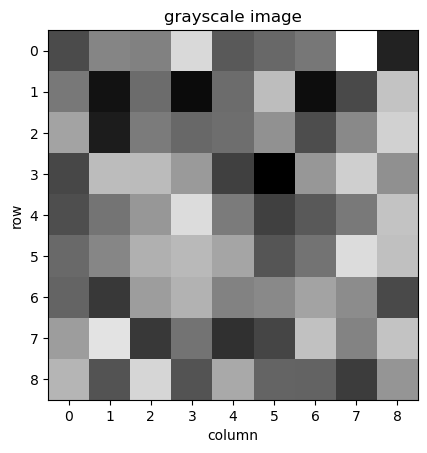

In [152]:
plot_filter(image=image_original, title='original image')
plot_filter_gs(image=image_grayscale, title='grayscale image')

The ```PIL.ImageOps``` function ```colorize``` can be used to colorize a grayscale image to color usually to a single channel, for example the red channel:

In [220]:
image_colorized = ImageOps.colorize(image_grayscale, black=(0, 0, 0), white=(255, 0, 0))

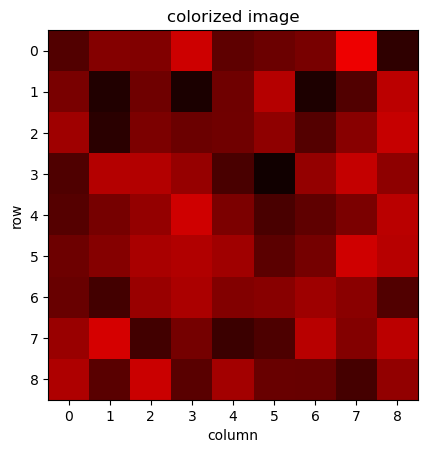

In [221]:
plot_filter(image=image_colorized, title='colorized image')

The ```PIL.ImageOps``` function ```flip``` can be used to flip an image vertical i.e. top to bottom:

In [157]:
image_flipped_tb = ImageOps.flip(image_original)

The ```PIL.ImageOps``` function ```mirror``` can be used to mirror an image i.e. flip it horizontally left to right:

In [158]:
image_flipped_lr = ImageOps.mirror(image_original)

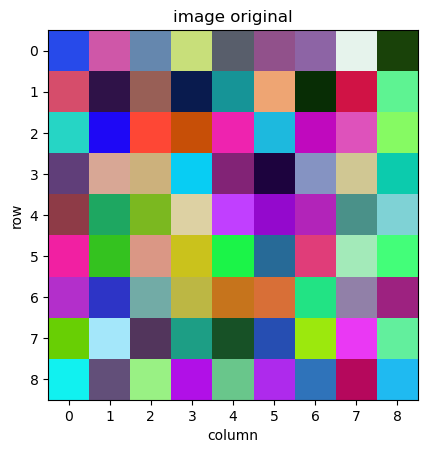

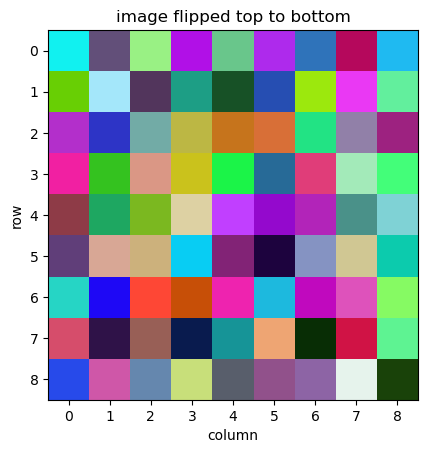

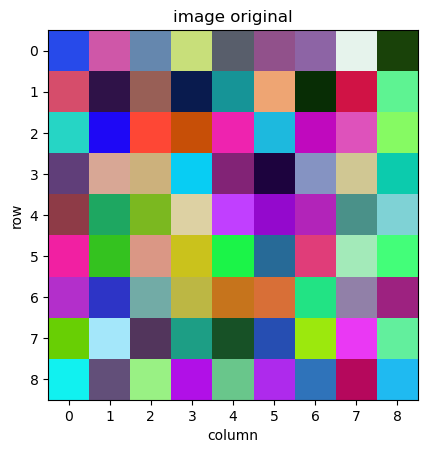

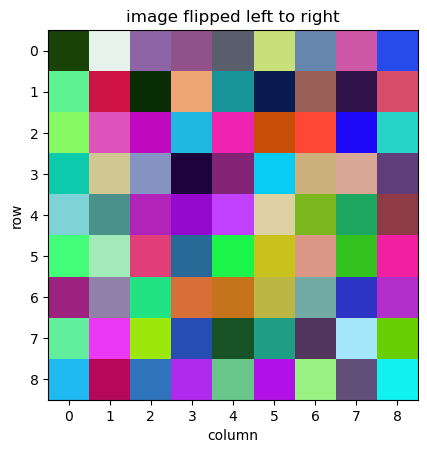

In [160]:
plot_filter(image=image_original, title='image original')
plot_filter(image=image_flipped_tb, title='image flipped top to bottom')
plot_filter(image=image_original, title='image original')
plot_filter(image=image_flipped_lr, title='image flipped left to right')

The ```PIL.ImageOps``` function ```crop``` can be used to crop an image using a specified border width in pixels

In [163]:
image_cropped = ImageOps.crop(image=image_original, border=2)

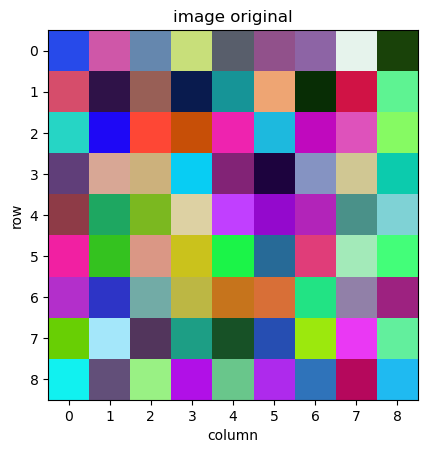

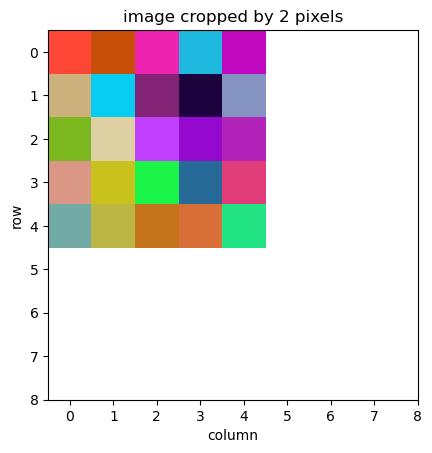

In [164]:
plot_filter(image=image_original, title='image original')
plot_filter(image=image_cropped, title='image cropped by 2 pixels')

The ```PIL.ImageOps``` function ```exapand``` can be used to expand an image using a specified border width in pixels:

In [260]:
image_expanded = ImageOps.expand(image=image_cropped, border=2)

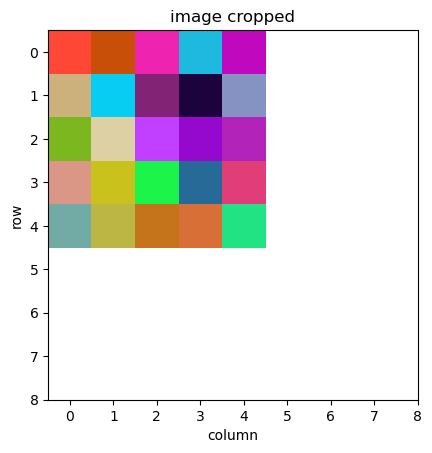

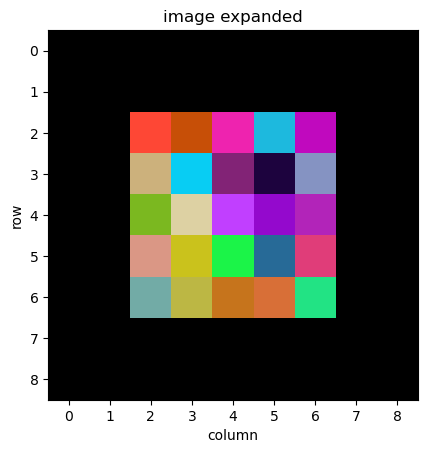

In [262]:
plot_filter(image=image_cropped, title='image cropped')
plot_filter(image=image_expanded, title='image expanded')

The ```PIL.ImageOps``` function ```pad``` can be used to pad an image to a certain size:

In [256]:
image_pad = ImageOps.pad(image=image_cropped, size=(9, 9))

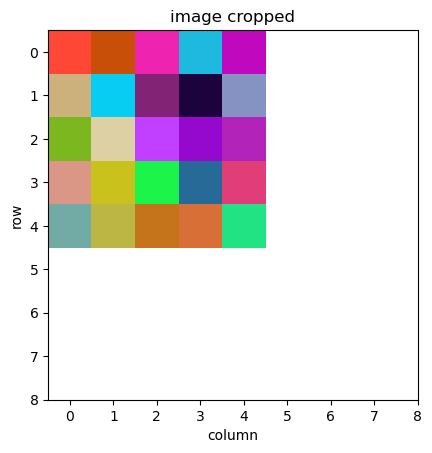

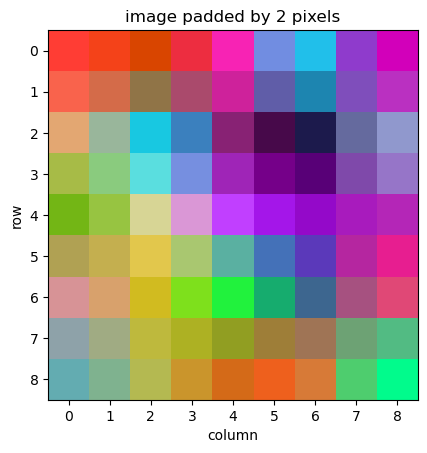

In [257]:
plot_filter(image=image_cropped, title='image cropped')
plot_filter(image=image_pad, title='image padded by 2 pixels')

If a large number of pixels are used, the following blurry looking image is obtained:

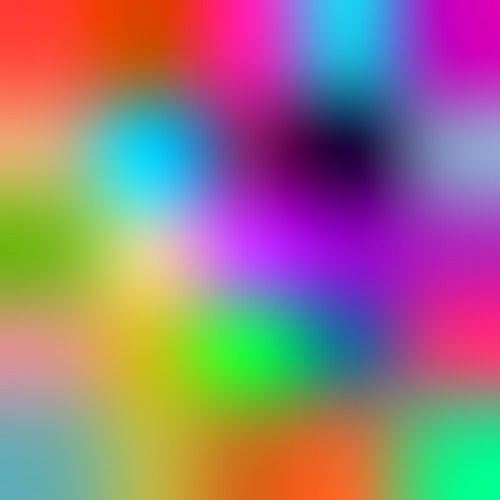

In [236]:
ImageOps.pad(image=image_cropped, size=(500, 500))

The ```PIL.ImageOps``` function ```contain``` is similar to ```pad``` however has better support for maintaining the aspect ratio, because this is a square image, the results are equivalent:

In [241]:
image_contain = ImageOps.contain(image_cropped, size=(3, 3))

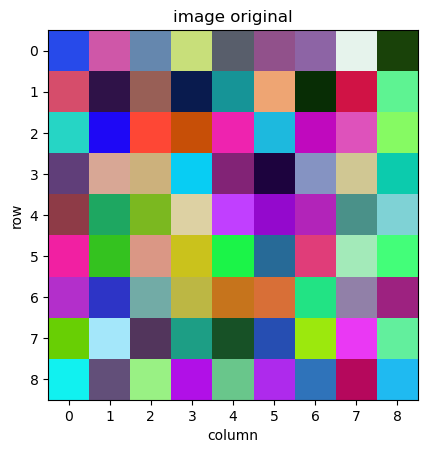

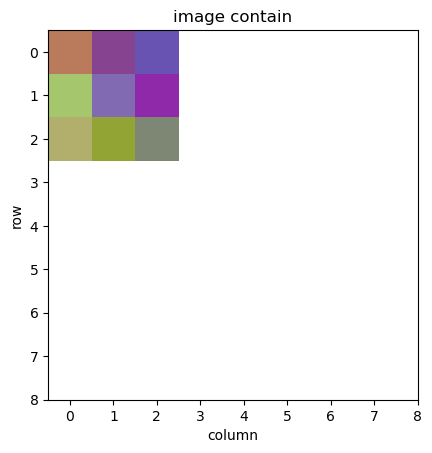

In [242]:
plot_filter(image=image_original, title='image original')
plot_filter(image=image_contain, title='image contain')

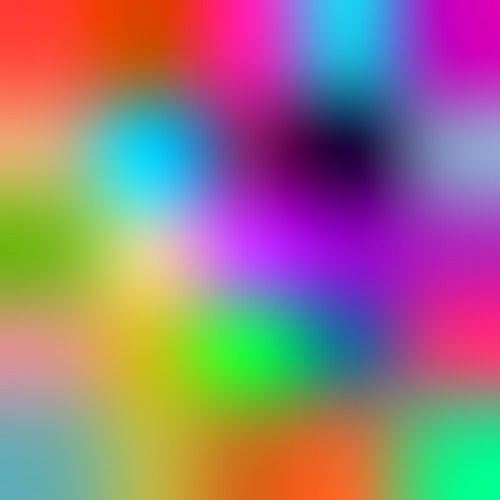

In [243]:
ImageOps.contain(image_cropped, size=(500, 500))

In [248]:
ImageOps.deform?

Signature: ImageOps.deform(image, deformer, resample=<Resampling.BILINEAR: 2>)
Docstring:
Deform the image.

:param image: The image to deform.
:param deformer: A deformer object.  Any object that implements a
                ``getmesh`` method can be used.
:param resample: An optional resampling filter. Same values possible as
   in the PIL.Image.transform function.
:return: An image.
File:      c:\users\pyip\miniconda3\envs\jupyterlab\lib\site-packages\pil\imageops.py
Type:      function

In [247]:
ImageOps.equalize?

Signature: ImageOps.equalize(image, mask=None)
Docstring:
Equalize the image histogram. This function applies a non-linear
mapping to the input image, in order to create a uniform
distribution of grayscale values in the output image.

:param image: The image to equalize.
:param mask: An optional mask.  If given, only the pixels selected by
             the mask are included in the analysis.
:return: An image.
File:      c:\users\pyip\miniconda3\envs\jupyterlab\lib\site-packages\pil\imageops.py
Type:      function

In [246]:
ImageOps.autocontrast?

Signature:
ImageOps.autocontrast(
    image,
    cutoff=0,
    ignore=None,
    mask=None,
    preserve_tone=False,
)
Docstring:
Maximize (normalize) image contrast. This function calculates a
histogram of the input image (or mask region), removes ``cutoff`` percent of the
lightest and darkest pixels from the histogram, and remaps the image
so that the darkest pixel becomes black (0), and the lightest
becomes white (255).

:param image: The image to process.
:param cutoff: The percent to cut off from the histogram on the low and
               high ends. Either a tuple of (low, high), or a single
               number for both.
:param ignore: The background pixel value (use None for no background).
:param mask: Histogram used in contrast operation is computed using pixels
             within the mask. If no mask is given the entire image is used
             for histogram computation.
:param preserve_tone: Preserve image tone in Photoshop-like style autocontrast.

                     

In [244]:
ImageOps.fit?

Signature:
ImageOps.fit(
    image,
    size,
    method=<Resampling.BICUBIC: 3>,
    bleed=0.0,
    centering=(0.5, 0.5),
)
Docstring:
Returns a resized and cropped version of the image, cropped to the
requested aspect ratio and size.

This function was contributed by Kevin Cazabon.

:param image: The image to resize and crop.
:param size: The requested output size in pixels, given as a
             (width, height) tuple.
:param method: Resampling method to use. Default is
               :py:attr:`~PIL.Image.Resampling.BICUBIC`.
               See :ref:`concept-filters`.
:param bleed: Remove a border around the outside of the image from all
              four edges. The value is a decimal percentage (use 0.01 for
              one percent). The default value is 0 (no border).
              Cannot be greater than or equal to 0.5.
:param centering: Control the cropping position.  Use (0.5, 0.5) for
                  center cropping (e.g. if cropping the width, take 50% off
             

In [249]:
ImageOps.operator?

Call signature: ImageOps.operator(obj, /, *args, **kwargs)
Type:           module
String form:    <module 'operator' from 'c:\\Users\\pyip\\miniconda3\\envs\\jupyterlab\\Lib\\operator.py'>
File:           c:\users\pyip\miniconda3\envs\jupyterlab\lib\operator.py
Docstring:     
Operator interface.

This module exports a set of functions implemented in C corresponding
to the intrinsic operators of Python.  For example, operator.add(x, y)
is equivalent to the expression x+y.  The function names are those
used for special methods; variants without leading and trailing
'__' are also provided for convenience.
Call docstring: Same as obj(*args, **kwargs).

In [251]:
ImageOps.solarize?

Signature: ImageOps.solarize(image, threshold=128)
Docstring:
Invert all pixel values above a threshold.

:param image: The image to solarize.
:param threshold: All pixels above this greyscale level are inverted.
:return: An image.
File:      c:\users\pyip\miniconda3\envs\jupyterlab\lib\site-packages\pil\imageops.py
Type:      function

In [252]:
ImageOps.scale?

Signature: ImageOps.scale(image, factor, resample=<Resampling.BICUBIC: 3>)
Docstring:
Returns a rescaled image by a specific factor given in parameter.
A factor greater than 1 expands the image, between 0 and 1 contracts the
image.

:param image: The image to rescale.
:param factor: The expansion factor, as a float.
:param resample: Resampling method to use. Default is
                 :py:attr:`~PIL.Image.Resampling.BICUBIC`.
                 See :ref:`concept-filters`.
:returns: An :py:class:`~PIL.Image.Image` object.
File:      c:\users\pyip\miniconda3\envs\jupyterlab\lib\site-packages\pil\imageops.py
Type:      function

## ImageTransform Module

In [121]:
from PIL import ImageTransform

In [122]:
help(ImageTransform)

Help on module PIL.ImageTransform in PIL:

NAME
    PIL.ImageTransform

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # transform wrappers
    #
    # History:
    # 2002-04-08 fl   Created
    #
    # Copyright (c) 2002 by Secret Labs AB
    # Copyright (c) 2002 by Fredrik Lundh
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    PIL.Image.ImageTransformHandler(builtins.object)
        Transform
            AffineTransform
            ExtentTransform
            MeshTransform
            QuadTransform
    
    class AffineTransform(Transform)
     |  AffineTransform(data)
     |  
     |  Define an affine image transform.
     |  
     |  This function takes a 6-tuple (a, b, c, d, e, f) which contain the first
     |  two rows from an affine transform matrix. For each pixel (x, y) in the
     |  output image, the new value is taken from a position (a x + b y + c,
     |  d x + e y + f) in the input image, rounded to near

In [123]:
ImageEnhance.Contrast?

Init signature: ImageEnhance.Contrast(image)
Docstring:     
Adjust image contrast.

This class can be used to control the contrast of an image, similar
to the contrast control on a TV set. An enhancement factor of 0.0
gives a solid grey image. A factor of 1.0 gives the original image.
File:           c:\users\pyip\miniconda3\envs\jupyterlab\lib\site-packages\pil\imageenhance.py
Type:           type
Subclasses:     

## ImageDraw Module

In [124]:
from PIL import ImagePalette, ImageChops, ImageSequence, ImageDraw, ImageDraw2

In [125]:
from PIL import ImageGrab, ImageShow

In [253]:
help(ImageShow)

Help on module PIL.ImageShow in PIL:

NAME
    PIL.ImageShow

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # im.show() drivers
    #
    # History:
    # 2008-04-06 fl   Created
    #
    # Copyright (c) Secret Labs AB 2008.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.object
        Viewer
            IPythonViewer
            MacViewer
            UnixViewer
                DisplayViewer
                EogViewer
                GmDisplayViewer
                XDGViewer
                XVViewer
            WindowsViewer
    
    class DisplayViewer(UnixViewer)
     |  The ImageMagick ``display`` command.
     |  This viewer supports the ``title`` parameter.
     |  
     |  Method resolution order:
     |      DisplayViewer
     |      UnixViewer
     |      Viewer
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  get_command_ex(self, file, title=None, **options)
     |

ImageMath

## ImageGrab Module

The ```ImageGrab``` module has two functions, ```grab``` which takes a screenshot:

In [127]:
image = ImageGrab.grab()

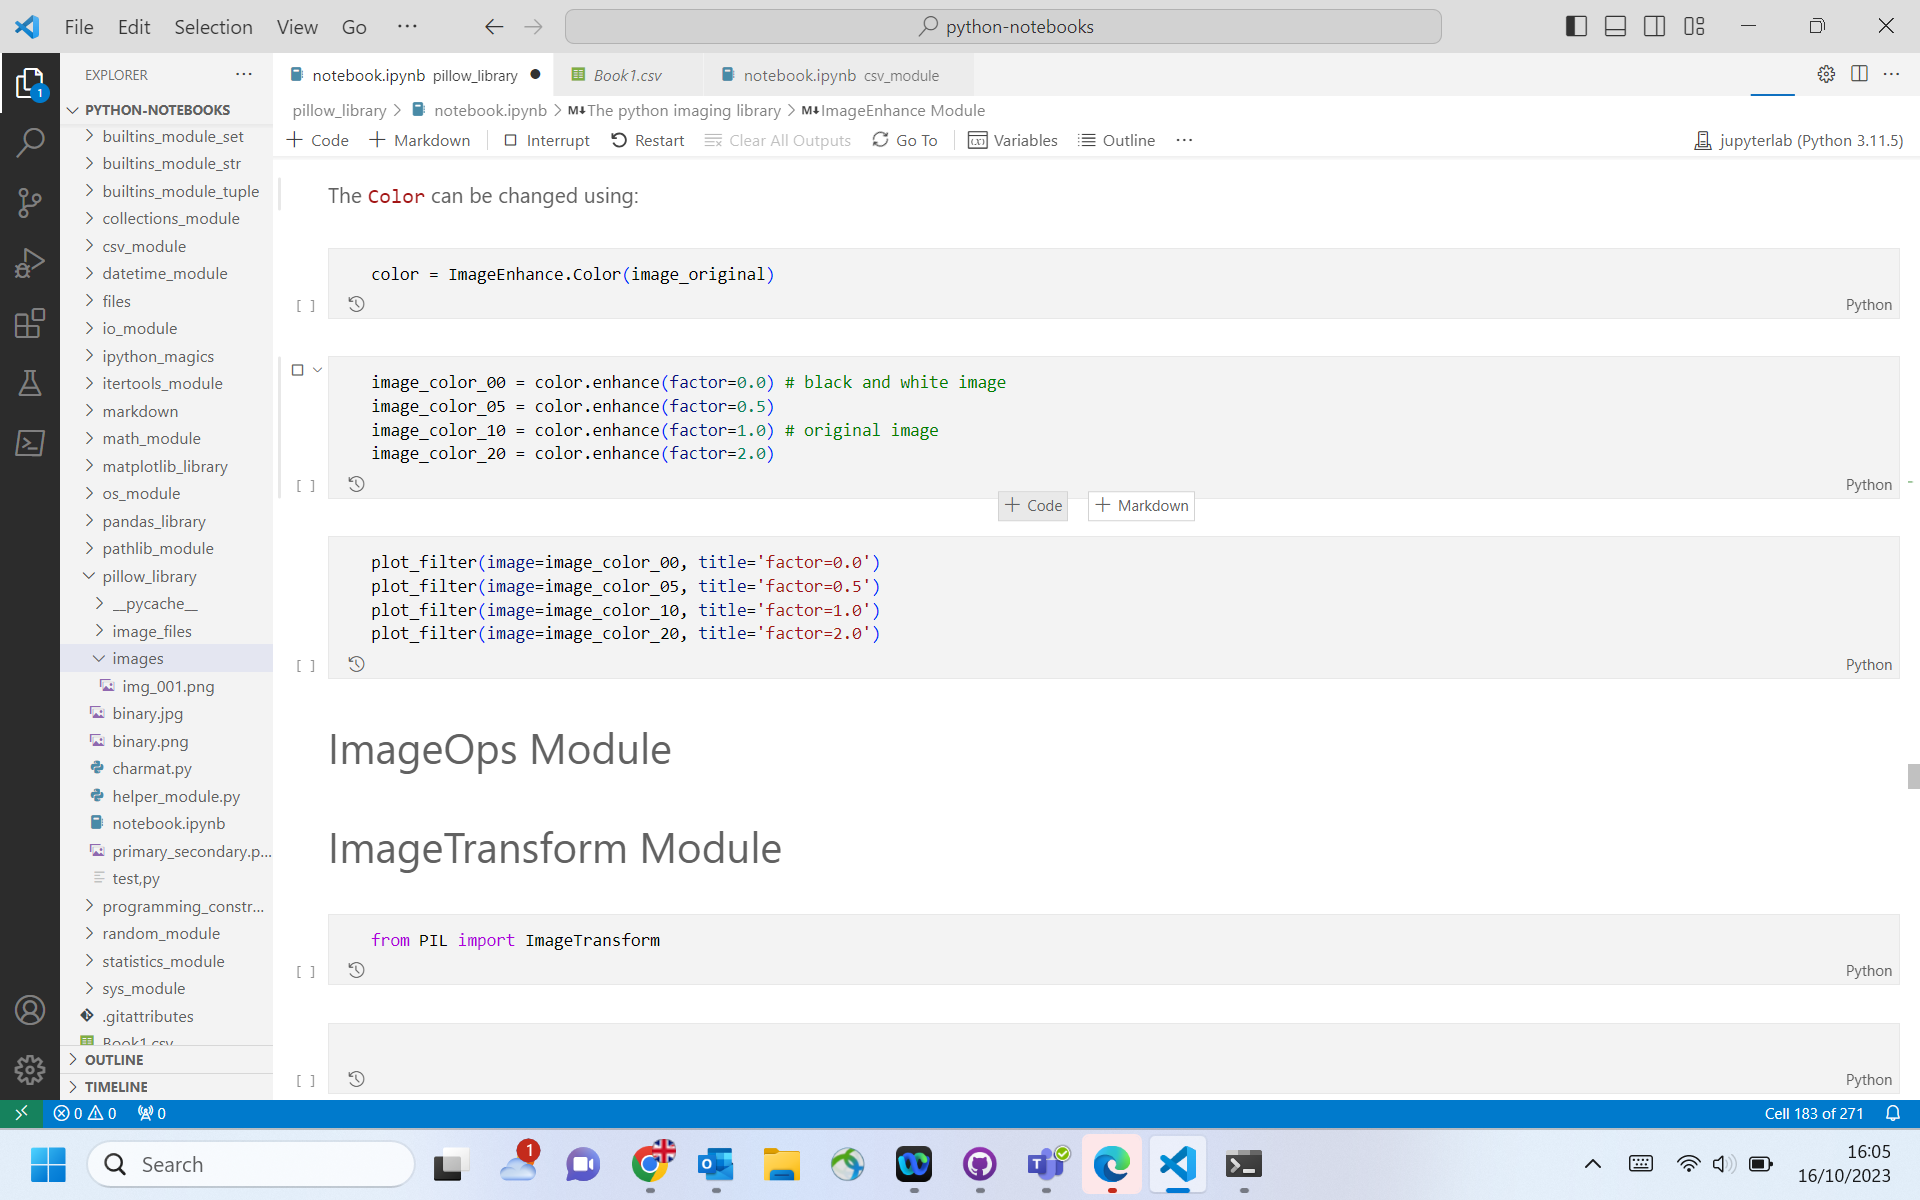

In [128]:
image

The ```size``` will match your screen resolution, width (number of columns) by height (number of rows):

In [129]:
image.size

(1920, 1200)

In [130]:
image.mode

'RGB'

In [131]:
image.format

And ```grabclipboard``` which is configured to read an image from the clipboard:

In [132]:
image = ImageGrab.grabclipboard()

This content will deepend on what you have last saved to clipboard:

In [133]:
image

In [134]:
image.size

AttributeError: 'NoneType' object has no attribute 'size'

In [ ]:
image.mode

In [ ]:
image.format

## Loading in an Image

In [ ]:
imgage = Image.open(r'.\image_files\img_001.jpg')

In [ ]:
image

In [ ]:
img.width

In [ ]:
img.height

In [ ]:
img.size

In [ ]:
img.mode

In [ ]:
img.format

img

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the 5x5 pattern
pattern = np.array([[0, 1, 0, 1, 0],
                    [1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0],
                    [1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0]], dtype=np.uint8) * 255  # 0 for black, 1 for white

# Create a Pillow image from the data
image = Image.fromarray(pattern)

# Plot the image using Matplotlib
plt.imshow(image, cmap='gray', interpolation='none')

# Set row and column labels as integers
plt.xticks(np.arange(5), [str(i) for i in range(5)])
plt.yticks(np.arange(5), [str(i) for i in range(5)])

# Add row and column numbers
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'({i}, {j})', ha='center', va='center', color='red')

# Set labels and show the plot
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('5x5 Monochrome Image with Row and Column Numbers')
plt.show()


In [ ]:
import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple with correct format
def hex_to_rgb_corrected(hex_color):
    rgb_tuple = ImageColor.getcolor(hex_color, "RGB")
    return tuple(reversed(rgb_tuple))[:3]  # Correct the format and extract only the RGB values

# Array of hexadecimal color values (2D)
hex_colors = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
np.vectorize(hex_to_rgb_corrected, otypes=[np.uint8, np.uint8, np.uint8])(hex_colors)





In [ ]:
def show_character(pattern):
    image = Image.fromarray(pattern)

    fig, ax = plt.subplots();
    ax.imshow(image, cmap='gray', interpolation='none');

    ax.set_xticks(np.arange(5), [str(i) for i in range(5)]);
    ax.set_yticks(np.arange(5), [str(i) for i in range(5)]);

    for i in range(5):
        for j in range(5):
            ax.text(j, i, f'({i}, {j})', ha='center', va='center', color='red');

    # Set labels and show the plot
    ax.set_xlabel('Column');
    ax.set_ylabel('Row');
    ax.set_title('5x5 Monochrome Image with Row and Column Numbers');


In [ ]:
from charmat import character_matrix, character_matrix_inverted

In [ ]:
show_character(character_matrix['A'])

In [ ]:
show_character(character_matrix_inverted['A'])

In [ ]:
show_character(character_matrix_inverted['B'])

In [ ]:
show_character(character_matrix_inverted['C'])

In [ ]:
def show_text(line='HELLO WORLD!'):
    from charmat import character_matrix_inverted
    fig, ax = plt.subplots(nrows=1, ncols=16);

    if len(line) == 16:
        pass
    elif len(line) < 16:
        line = line.ljust(16)
    else:
        line = line[:16]

    for idx, letter in enumerate(line):
        pattern = character_matrix_inverted[letter]
        image = Image.fromarray(pattern)
        ax[idx].imshow(image, cmap='gray', interpolation='none');
        ax[idx].axis('off');
    

In [ ]:
show_text()

In [ ]:
show_text('BYE WORLD!')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x2 pixels
image = Image.new('RGB', (2, 2))

# Set individual pixel colors
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # k, r, g, b

# Assign the colors to the pixels
image.putpixel((0, 0), pixel_colors[0])  # Black
image.putpixel((1, 0), pixel_colors[1])  # Red
image.putpixel((0, 1), pixel_colors[2])  # Green
image.putpixel((1, 1), pixel_colors[3])  # Blue

# Convert the image to a NumPy array
image_np = np.array(image)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot the color image
ax.imshow(image_np)
ax.set_title('Color Image')
ax.set_xticks(range(image_np.shape[1]))
ax.set_yticks(range(image_np.shape[0]))
ax.set_xticklabels(range(image_np.shape[1]))
ax.set_yticklabels(range(image_np.shape[0]))
ax.set_xlabel('X (Pixel Column)')
ax.set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x4 pixels
image = Image.new('RGB', (4, 2))

# Set individual pixel colors in the new order k, r, g, b, c, y, m, w
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255),
                (0, 255, 255), (255, 255, 0), (255, 0, 255),
                (255, 255, 255)]  # k, r, g, b, c, y, m, w

for i in range(2):
    for j in range(4):
        image.putpixel((j, i), pixel_colors[i*4 + j])

# Convert the image to a NumPy array
image_np = np.array(image)

# Split the image into color channels
red_channel = image_np[:,:,0]
green_channel = image_np[:,:,1]
blue_channel = image_np[:,:,2]

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot each color channel
axs[0, 0].imshow(red_channel, cmap='Reds')
axs[0, 0].set_title('Red Channel')
axs[0, 0].set_xticks(range(red_channel.shape[1]))
axs[0, 0].set_yticks(range(red_channel.shape[0]))
axs[0, 0].set_xticklabels(range(red_channel.shape[1]))
axs[0, 0].set_yticklabels(range(red_channel.shape[0]))
axs[0, 0].set_xlabel('X (Pixel Column)')
axs[0, 0].set_ylabel('Y (Pixel Row)')

axs[0, 1].imshow(green_channel, cmap='Greens')
axs[0, 1].set_title('Green Channel')
axs[0, 1].set_xticks(range(green_channel.shape[1]))
axs[0, 1].set_yticks(range(green_channel.shape[0]))
axs[0, 1].set_xticklabels(range(green_channel.shape[1]))
axs[0, 1].set_yticklabels(range(green_channel.shape[0]))
axs[0, 1].set_xlabel('X (Pixel Column)')
axs[0, 1].set_ylabel('Y (Pixel Row)')

axs[1, 0].imshow(blue_channel, cmap='Blues')
axs[1, 0].set_title('Blue Channel')
axs[1, 0].set_xticks(range(blue_channel.shape[1]))
axs[1, 0].set_yticks(range(blue_channel.shape[0]))
axs[1, 0].set_xticklabels(range(blue_channel.shape[1]))
axs[1, 0].set_yticklabels(range(blue_channel.shape[0]))
axs[1, 0].set_xlabel('X (Pixel Column)')
axs[1, 0].set_ylabel('Y (Pixel Row)')

# Plot the color image
axs[1, 1].imshow(image_np)
axs[1, 1].set_title('Color Image')
axs[1, 1].set_xticks(range(image_np.shape[1]))
axs[1, 1].set_yticks(range(image_np.shape[0]))
axs[1, 1].set_xticklabels(range(image_np.shape[1]))
axs[1, 1].set_yticklabels(range(image_np.shape[0]))
axs[1, 1].set_xlabel('X (Pixel Column)')
axs[1, 1].set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()

In [ ]:
NROWS = 100
NCOLS = 200
NCOLORS = 3

image_data = np.zeros((NROWS, NCOLS, NCOLORS))

In [ ]:
fig, ax = plt.subplots();
ax.imshow(image_data);
ax.set_xlabel('column');
ax.set_ylabel('row');

In [ ]:
NROWS = 100
NCOLS = 200
NCOLORS = 3

image_data = np.zeros((NROWS, NCOLS, NCOLORS))

In [ ]:
ROWS = slice(0, 50)
COLS = slice(0, 25)
RED = 0
GREEN = 1
BLUE = 2

In [ ]:
image_data[ROWS, COLS]